# Natural Language Processing for Amazon Toys Categorization

## Author: 
Michael Weiherer </p>

Johannes Georg Larcher </p>

***Studies:*** Machine Learning ILV </p>

***Lector:*** Lukas Huber, MSc </p>

***University:*** Fachhochschule Kufstein Tirol </p>




# Agenda:

1. __Initial Situation / Status Quo__ <a href='#1.Section'>Link to Section</a>
2. __Project Goal__ <a href='#2.Section'>Link to Section</a>
3. __Project Setup__ <a href='#3.Section'>Link to Section</a>
4. __Project Analysis__ <a href='#4.Section'>Link to Section</a>
5. __Preprocess Text__ <a href='#5.Section'>Link to Section</a>
6. __Project Goal__ <a href='#6.Section'>Link to Section</a>
7. __Project Setup__ <a href='#7.Section'>Link to Section</a>
8. __Project Analysis__ <a href='#8.Section'>Link to Section</a>

# Comment Lucas:
#### Abgabe 2:  	

sehr interessante Umsetzung von NLP - spannend was ihr in eurem WS3 abgeben werdet. \
Hoffe es gibt noch mehr Gelegenheit die Klassifiaktion von Amazon genauer anzusehen und Amazon erlaubt solche Vorgänge.

#### Angabe 3:
Zeigt die Anwendbarkeit und bringt euer “Projekt” zum Abschluss. Beantwortet ein “Big-Picture” - was war/ist das Problem und die Ausgangssituation? Was konntet ihr verbessern? Was sind weitere Möglichkeiten für zukünftige Entwicklungen? Was lief gut, was weniger?

- Anwendung von einem der Vorhergehenden Themen (DL, CNN, GAN, NLP, Time-Series, OCR,…) - Bindet das Thema ein.
- Wovon kann euer Projekt profitieren?
- Sind Limitationen zu erwarten (Hardware, Datenqualität, …) bzw. aufgetreten?


## 1.) Initial Situation / Status Quo
<a id='1.Section'></a>
Currently the categorization of products on Amazon is defined by the input of the manufacturers through their external portal (VendorCentral). Therefore manufacturers choose the category/subcategory in which their products belong. \
Round about 20% - 30% of the selection is currently wrongly categorized which has following negative effects: \
- Bad customer experience on the website due to wrong search results when filtering for categories
- Wrong analysis when looking into category data (internal reviews as well as external reports for manufacturers)
- Impacted ordering as Amazon systems has different inbound strategies per category (very important right now during Covid-19 prioritization)

## 2.) Project Goal
<a id='2.Section'></a>
Our goal is to identify if a toys product belongs to the category games & puzzles by its item-name. This is crucial for Amazon currently as this is one of the most important categories during COVID-19 as customers started to puzzle/play more during the lockdown. Therefore we are going to use the Natural Language Processing feature and different neural nets for optimization and testing. 

## 3.) Project Setup
<a id='3.Section'></a>
First of all, we have loaded the appropiate packages for our project and the pre processed data as csv. 

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import seaborn as sns

Using TensorFlow backend.


In [2]:
data = pd.read_csv("data/rawdata2.csv", encoding='latin-1')

## 4.) Project Analysis 
<a id='4.Section'></a>
Next step was to get a look at the pre processed data (check for missing values, check for distributions) 

In [3]:
data.head()

,Identifier,Item_Name,Category
0,B019YGSAPW,Ravensburger Spiele 23409 - Schwarzer Peter Mi...,0300 Games & Puzzles
1,B000QGRCN6,Henrys A01002-S01 - Yo-Yo Ersatzschnüre 6 Stüc...,0900 Outdoor & Sports Toys
2,B00KB45ULE,"London Teddy Bears 4X-CLQL-QFJN Sorry, es TUT ...",0700 Plush
3,B07NDXZ8ZH,KiddyMoon 90X30cm/300 Bälle ? 7Cm Bällebad Bab...,0900 Outdoor & Sports Toys
4,B079QGYCS7,Eichhorn 100003408 - Musik Set enthält Trommel...,1300 All Other


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39500 entries, 0 to 39499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Identifier  39500 non-null  object
 1   Item_Name   39500 non-null  object
 2   Category    39500 non-null  object
dtypes: object(3)
memory usage: 925.9+ KB


In [5]:
data.isna().any()

Identifier    False
Item_Name     False
Category      False
dtype: bool

In [6]:
data["Category"][3]

'0900 Outdoor & Sports Toys'

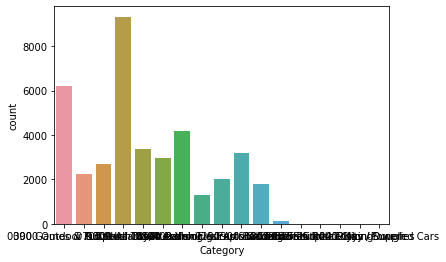

In [7]:
sns.countplot(x='Category', data=data)

## 5.) Preprocess Text
<a id='5.Section'></a>
In this next step, we deleted values (html-tags, punctuations and numbers etc.) We deleted these values to ensure a good performance for the neural nets. 

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JohnnyRage\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
 
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
 
  # visualize words and frequencies
  plt.figure(figsize=(12,15))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

C:\Users\JohnnyRage\miniconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JohnnyRage\miniconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 150 missing from current font.
  font.load_char(ord(s), flags=flags)


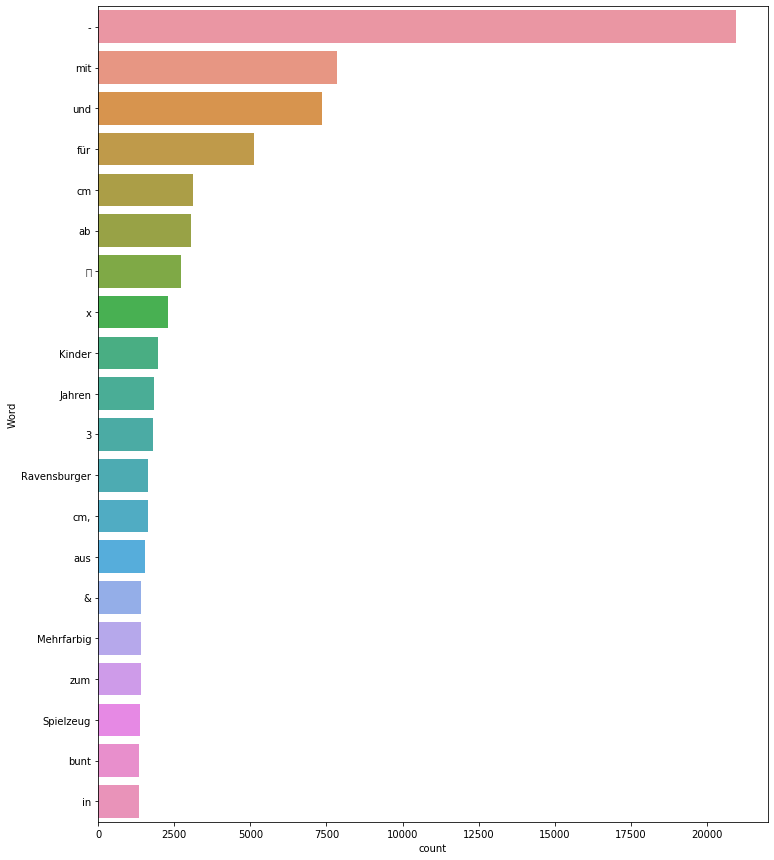

In [10]:
freq_words(data['Item_Name'], 20)

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('german'))

 

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

 

data['Item_Name'] = data['Item_Name'].apply(lambda x: remove_stopwords(x))

C:\Users\JohnnyRage\miniconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JohnnyRage\miniconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 150 missing from current font.
  font.load_char(ord(s), flags=flags)


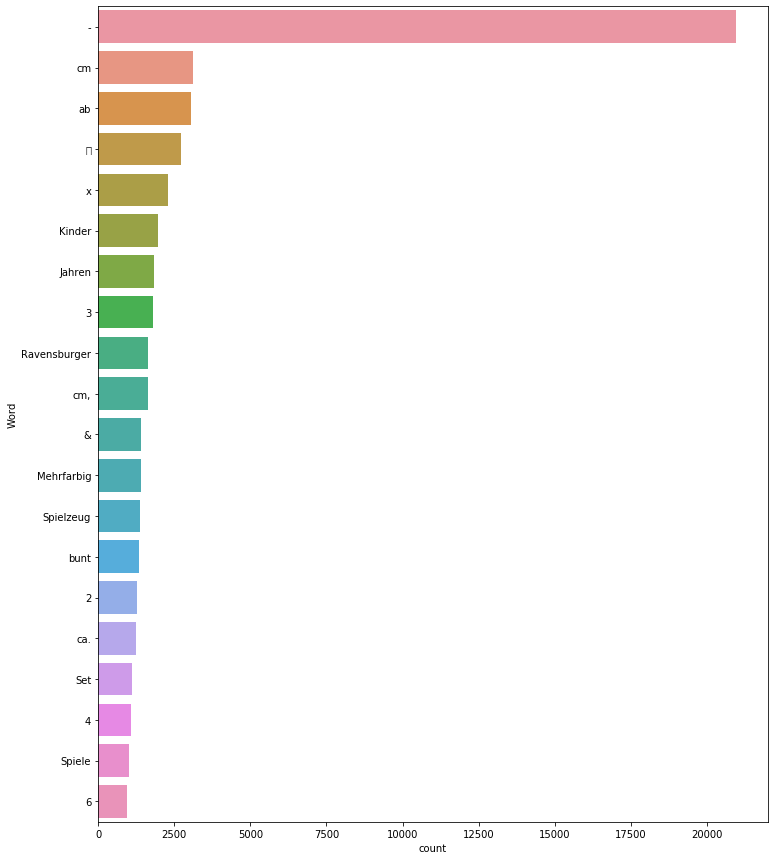

In [12]:
freq_words(data['Item_Name'], 20)

In [13]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    #Removing BackSlash
    sentence = re.sub("\'", "", sentence)
    
    #Removing Minus
    sentence = re.sub("-", "", sentence)
    
    #Remove CaseSensitive
    sentence = sentence.lower()

    return sentence

In [14]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [15]:
data['Item_Name'] = data['Item_Name'].apply(lambda x:preprocess_text(x))

In [16]:
data

,Identifier,Item_Name,Category
0,B019YGSAPW,ravensburger spiele schwarzer peter mitbringspiel,0300 Games & Puzzles
1,B000QGRCN6,henrys s yo yo ersatzschn re st ck wei,0900 Outdoor & Sports Toys
2,B00KB45ULE,london teddy bears clql qfjn sorry tut mir lei...,0700 Plush
3,B07NDXZ8ZH,kiddymoon cm lle cm llebad baby spielbad mit b...,0900 Outdoor & Sports Toys
4,B079QGYCS7,eichhorn musik set enth lt trommel triangel ma...,1300 All Other
...,...,...,...
39495,B07SBHBR4G,animagic einhorn destiny elektronisches haustier,0700 Plush
39496,B077MYDXF1,heye oktoberfest triangular teile christoph sc...,0300 Games & Puzzles
39497,B07K8SKX73,monster jam monster dirt starterset monster di...,0400 Vehicles
39498,B019YY2E2Y,kinetic sand sand box set blau,0200 Arts & Crafts


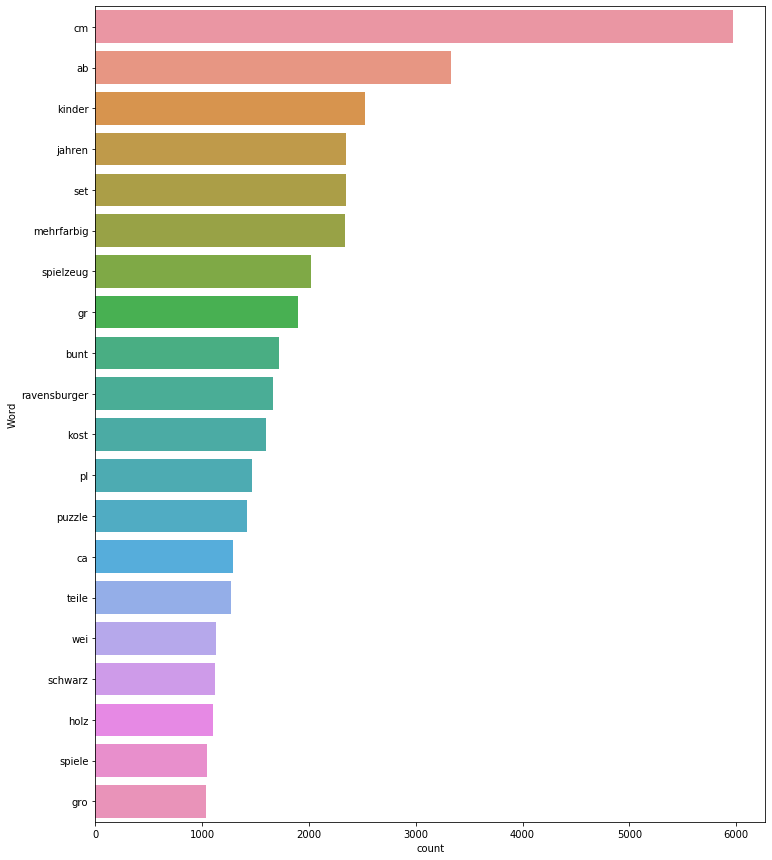

In [17]:
freq_words(data['Item_Name'], 20)

## 6.) Split between Features (X) to predict (y) | Implement Train-Test-Split
<a id='6.Section'></a>

In [18]:
X = []
sentences = list(data['Item_Name'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [19]:
X[10]

'hot wheels gcg monster trucks bone shaker double troubles'

In [20]:
y = data['Category']

y = np.array(list(map(lambda x: 1 if x=="0300 Games & Puzzles" else 0, y)))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 7.) Tokenizer
<a id='7.Section'></a>

As a first step, we will use the Tokenizer class from the keras.preprocessing.text module to create a word-to-index dictionary. In the word-to-index dictionary, each word in the corpus is used as a key, while a corresponding unique index is used as the value for the key.

In [22]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

**Padding:** We used the so called padding method to ensure that X_train and X_test have the same length otherwise we would not be able to work with our data. 

In [23]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [24]:
X_train

array([[ 339,    0,    0, ...,    0,    0,    0],
       [ 159, 1129,  266, ...,    0,    0,    0],
       [1040,  367, 1752, ...,    0,    0,    0],
       ...,
       [ 198,   21,  953, ...,    0,    0,    0],
       [ 129,  282,  313, ...,    0,    0,    0],
       [  36,   27,    6, ...,    0,    0,    0]])

## 8.) Embedded Dictionary
<a id='8.Section'></a>

We will use Glove embeddings to create our feature matrix. In the script we load the Glove word embeddings and create a dictionary. This will contain words as keys and their corresponding embedding list as values.

In [25]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('data/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()


In [26]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

## 9.) Simple Neural Network
<a id='9.Section'></a>

In [27]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2878400   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10001     
Total params: 2,888,401
Trainable params: 10,001
Non-trainable params: 2,878,400
_________________________________________________________________
None


In [29]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 25280 samples, validate on 6320 samples
Epoch 1/10
25280/25280 [==============================] - 1s 29us/step - loss: 0.6613 - acc: 0.8443 - val_loss: 0.6321 - val_acc: 0.8411
Epoch 2/10
25280/25280 [==============================] - 1s 23us/step - loss: 0.6062 - acc: 0.8443 - val_loss: 0.5839 - val_acc: 0.8411
Epoch 3/10
25280/25280 [==============================] - 1s 24us/step - loss: 0.5630 - acc: 0.8443 - val_loss: 0.5464 - val_acc: 0.8411
Epoch 4/10
25280/25280 [==============================] - 1s 24us/step - loss: 0.5295 - acc: 0.8443 - val_loss: 0.5174 - val_acc: 0.8411
Epoch 5/10
25280/25280 [==============================] - 1s 23us/step - loss: 0.5036 - acc: 0.8443 - val_loss: 0.4953 - val_acc: 0.8411
Epoch 6/10
25280/25280 [==============================] - 1s 25us/step - loss: 0.4839 - acc: 0.8443 - val_loss: 0.4787 - val_acc: 0.8411
Epoch 7/10
25280/25280 [==============================] - 1s 24us/step - loss: 0.4691 - acc: 0.8443 - val_loss: 0.4664 - val_acc:

### Results

In [30]:
score = model.evaluate(X_test, y_test, verbose=1)

7900/7900 [==============================] - 0s 32us/step


In [31]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.44770321423494364
Test Accuracy: 0.8399999737739563


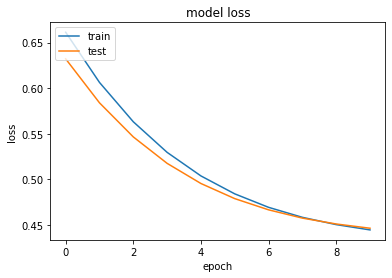

In [32]:
import matplotlib.pyplot as plt

#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train','test'], loc='upper left')
#plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## 10.) Recurrent Neural Network (LSTM) 
<a id='10.Section'></a>

In [33]:
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM


model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [34]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          2878400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,995,777
Trainable params: 117,377
Non-trainable params: 2,878,400
_________________________________________________________________
None


In [35]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 25280 samples, validate on 6320 samples
Epoch 1/6
25280/25280 [==============================] - 72s 3ms/step - loss: 0.4454 - acc: 0.8443 - val_loss: 0.4378 - val_acc: 0.8411
Epoch 2/6
25280/25280 [==============================] - 93s 4ms/step - loss: 0.4340 - acc: 0.8443 - val_loss: 0.4378 - val_acc: 0.8411
Epoch 3/6
25280/25280 [==============================] - 94s 4ms/step - loss: 0.4331 - acc: 0.8443 - val_loss: 0.4389 - val_acc: 0.8411
Epoch 4/6
25280/25280 [==============================] - 94s 4ms/step - loss: 0.4334 - acc: 0.8443 - val_loss: 0.4386 - val_acc: 0.8411
Epoch 5/6
25280/25280 [==============================] - 96s 4ms/step - loss: 0.4334 - acc: 0.8443 - val_loss: 0.4378 - val_acc: 0.8411
Epoch 6/6
7900/7900 [==============================] - 7s 845us/step


In [36]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4404510192327862
Test Accuracy: 0.8399999737739563


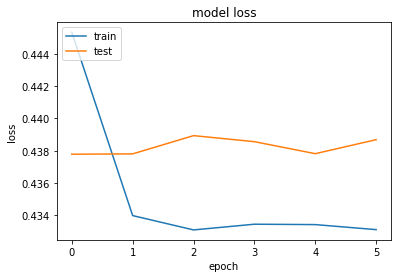

In [37]:
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train','test'], loc='upper left')
#plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## 11.) Predict a random toy
<a id='11.Section'></a>

In [38]:
instance = X[57]
print(instance)


jamara rc audi lms silber


In [39]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[0.17484091]], dtype=float32)

## 12.) Result
<a id='12.Section'></a>

As an result our model predicted 0,1649089. This means that our sigmoid functions predicts a floating value between 0 and 1. Therefore in our case the model predicted the above mentiond value. So when we have a look out our instace (Jamara RC Audi LMS silber) and search for it in our data we saw that it is categorized not as a Game/Puzzle. Our model also predicted it not to be a Game/Puzzle. 

So we can say that: 

under 0.5 = No Game/Puzzle </p>
above 0.5 = Game/Puzzle

## 13.) Outlook
<a id='13.Section'></a>

As our current model is only recognizing if a Toy is in the Category Games and Puzzles or not, the next step is to roll out this model on all Toys Categories and Subcategories as well as over multiple Product Families beside Toys. \
On the other side we will take this to our catalogue expert team to discuss next steps and other features to implement